In [32]:
import numpy as np
import pandas as pd
import time

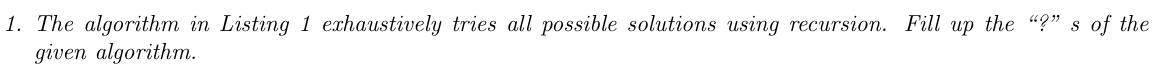

In [33]:
def is_subset_sum_recursive(arr, n, target, subset=[]):
  # Base Case: If target sum is achieved
  if target == 0:
      print("Subset with the given sum exists:", subset)
      return True

  # Base Case: If all elements are traversed but target sum is not achieved
  if n == 0 and target != 0:
      return False

  # If the last element is greater than the target, ignore it
  if arr[n - 1] > target:
      return is_subset_sum_recursive(arr, n - 1, target, subset)

  # Check if sum can be obtained by including or excluding the last element
  return is_subset_sum_recursive(arr, n - 1, target, subset) or is_subset_sum_recursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]])

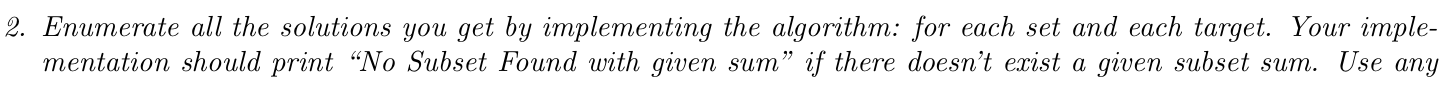

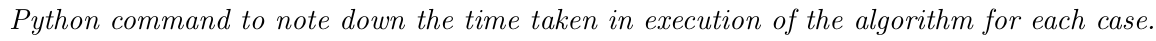

In [34]:
arr1= [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24]
arr2= [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
arr3= [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24]
arr4= [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
Target1= 140
Target2= 165
Target3= 182

In [35]:
arr = [arr1, arr2, arr3, arr4]
targets = [140, 165, 182]
time_store_recursive = []
for ar in arr:
  for target in targets:
    start_time = time.time()
    flag = is_subset_sum_recursive(ar, len(ar), target, subset=[])
    if not flag:
      print("No Subset Found with given sum")
    else:
      print(f'Target of {target} is achieved by this set {ar} for above printed subset')
    time_taken = time.time()-start_time
    time_store_recursive.append(time_taken)
    print(f"Time taken for target {target} and array {ar} for this Algo is : {time_taken}")
    print("--------------------------------------------------------------")

Subset with the given sum exists: [22, 20, 18, 16, 14, 12, 9, 9, 8, 6, 4, 2]
Target of 140 is achieved by this set [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for above printed subset
Time taken for target 140 and array [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for this Algo is : 0.015196561813354492
--------------------------------------------------------------
Subset with the given sum exists: [24, 22, 20, 16, 14, 12, 10, 9, 9, 9, 8, 6, 4, 2]
Target of 165 is achieved by this set [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for above printed subset
Time taken for target 165 and array [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for this Algo is : 0.026214599609375
--------------------------------------------------------------
No Subset Found with given sum
Time taken for target 182 and array [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for this Algo is : 0.020749568939208984
-------------------------------------------------------------

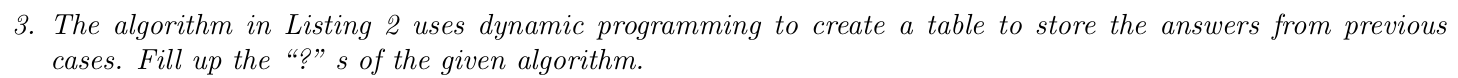

In [36]:

def subset_sum(numbers, target_sum):
    n = len(numbers)
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    numbers=list(numbers)
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True

    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]

    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] == dp[i - 1][j]:
            i -= 1
        else:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
            i -= 1

    return dp[n][target_sum], subset[::-1]


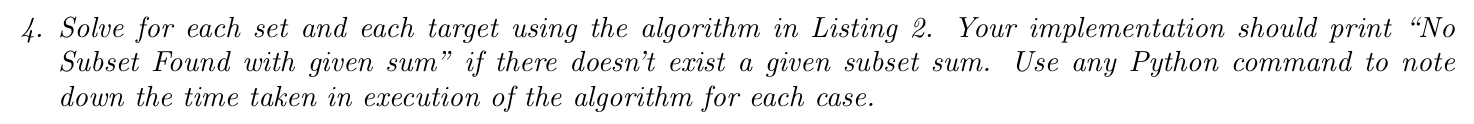

In [37]:
arr = [arr1, arr2, arr3, arr4]
targets = [140, 165, 182]
time_store_dp = []
for ar in arr:
  for target in targets:
    start_time = time.time()
    dp, subset = subset_sum(ar,target)
    if not dp:
      print("No Subset Found with given sum")
    else:
      print(f'Subset that achieved the target: {subset}')
      print(f'Target of {target} is achieved by this set {ar} for above printed subset')
    time_taken = time.time()-start_time
    time_store_dp.append(time_taken)
    print(f"Time taken for target {target} and array {ar} for this Algo is : {time_taken}")
    print("--------------------------------------------------------------")

Subset that achieved the target: [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22]
Target of 140 is achieved by this set [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for above printed subset
Time taken for target 140 and array [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for this Algo is : 0.002618551254272461
--------------------------------------------------------------
Subset that achieved the target: [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 20, 22, 24]
Target of 165 is achieved by this set [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for above printed subset
Time taken for target 165 and array [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for this Algo is : 0.0011410713195800781
--------------------------------------------------------------
No Subset Found with given sum
Time taken for target 182 and array [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] for this Algo is : 0.00124359130859375
------------------------------------------------------------

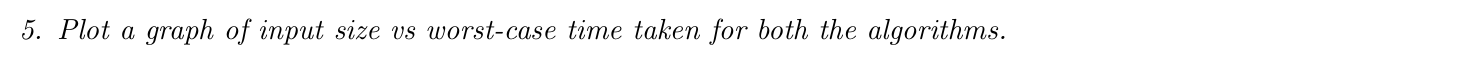

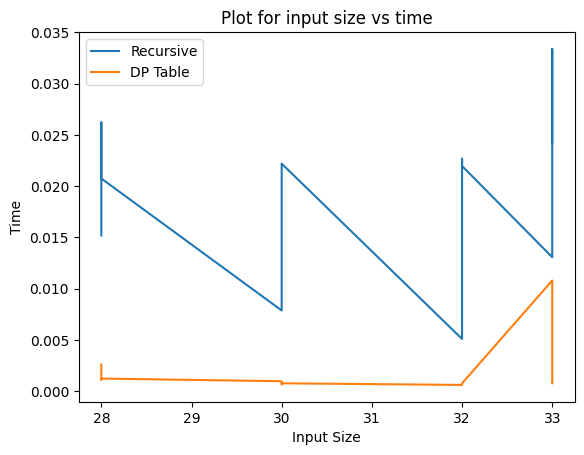

In [38]:
def digitcounter(arr, target):
  digits = 0
  for element in arr:
    digits += len(str(element))
  digits += len(str(target))
  digits += len(str(len(arr)))
  return digits

arr = [arr1, arr2, arr3, arr4]
targets = [140, 165, 182]

#finding input sizes:
input_sizes = []
for ar in arr:
  for target in targets:
    input_sizes.append(digitcounter(ar, target))

import matplotlib.pyplot as plt
plt.plot(input_sizes, time_store_recursive, label = "Recursive")
plt.title("Plot for input size vs time")
plt.plot(input_sizes, time_store_dp, label = "DP Table")
plt.ylabel("Time")
plt.xlabel("Input Size")
plt.legend()
